In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keplerprop import *

## Let's propgate the orbit of Ceres as a test

In [2]:
from astroquery.mpc import MPC

#lookup ceres elements
result = MPC.query_object('asteroid', name='ceres')

#extract
a = float(result[0]['semimajor_axis'])  # Semi-major axis (AU)
e = float(result[0]['eccentricity'])    # Eccentricity
i = float(result[0]['inclination'])     # Inclination (degrees)
omega = float(result[0]['argument_of_perihelion'])  # Argument of perihelion (degrees)
Omega = float(result[0]['ascending_node'])          # Longitude of ascending node (degrees)
M = float(result[0]['mean_anomaly'])    # Mean anomaly (degrees)
t0 = float(result[0]['epoch_jd'])       # Epoch (Julian Date)


In [3]:
from astroquery.jplhorizons import Horizons
from astropy.time import Time 
# Query Horizons for Ceres' heliocentric coordinates
def get_heliocentric_coords(asteroid_id, start_date, end_date):
    """
    Fetch heliocentric coordinates for a given asteroid from JPL Horizons.
    
    Parameters:
    asteroid_id : str or int
        Asteroid identifier (name, number, or designation)
    start_date  : str
        Start date in 'YYYY-MM-DD' format
    end_date    : str
        End date in 'YYYY-MM-DD' format
    
    Returns:
    Heliocentric coordinates as an Astropy Table.
    """    
    
    obj = Horizons(id=asteroid_id, location='500@10',epochs={'start': start_date, 'stop': end_date, 'step': '1d'}) #default location
    data=obj.vectors(refplane='ecliptic')[['x','y','z','vx','vy','vz']].as_array().data
    x = data['x']
    y = data['y']
    z = data['z']
    vx = data['vx']
    vy = data['vy']
    vz = data['vz']

    # Combine the extracted columns into a regular NumPy array
    # Each row will be [x, y, z, vx, vy, vz]
    rjpl = np.array([x, y, z]).T  # Transpose to make it (N, 6)
    vjpl = np.array([ vx, vy, vz]).T

    return rjpl,vjpl

In [4]:
mu = 0.000295912
tmax = 2000 #go forward 2000 days
dtgrid = np.linspace(0,tmax,2001) #grid for the propogator (1 per day sampling)

In [5]:
# Get heliocentric coordinates for asteroid Ceres
start_date = Time(t0, format='jd').iso[:10]
end_date = Time(t0 + tmax, format='jd').iso[:10]
rjpl,vjpl = get_heliocentric_coords("Ceres", start_date, end_date)

/home/moon/.local/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [6]:
rkep,vkep = compute_trajectory(dtgrid,[a,e,i,omega,Omega,M],mu)

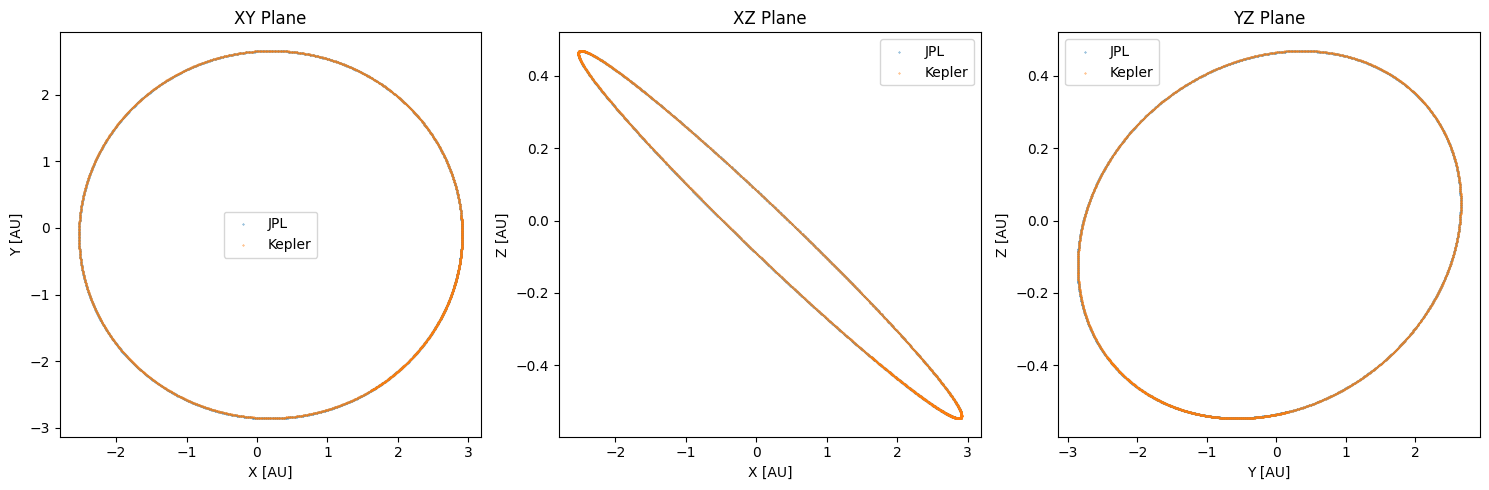

In [7]:
# Create a figure with 3 subplots (for XY, XZ, YZ views)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# XY plane (subplot 1)
axes[0].scatter(rjpl[:, 0], rjpl[:, 1], s=0.1, label='JPL')
axes[0].scatter(rkep[:, 0], rkep[:, 1], s=0.1, label='Kepler')
axes[0].set_xlabel('X [AU]')
axes[0].set_ylabel('Y [AU]')
axes[0].set_title('XY Plane')
axes[0].legend()

# XZ plane (subplot 2)
axes[1].scatter(rjpl[:, 0], rjpl[:, 2], s=0.1, label='JPL')
axes[1].scatter(rkep[:, 0], rkep[:, 2], s=0.1, label='Kepler')
axes[1].set_xlabel('X [AU]')
axes[1].set_ylabel('Z [AU]')
axes[1].set_title('XZ Plane')
axes[1].legend()

# YZ plane (subplot 3)
axes[2].scatter(rjpl[:, 1], rjpl[:, 2], s=0.1, label='JPL')
axes[2].scatter(rkep[:, 1], rkep[:, 2], s=0.1, label='Kepler')
axes[2].set_xlabel('Y [AU]')
axes[2].set_ylabel('Z [AU]')
axes[2].set_title('YZ Plane')
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

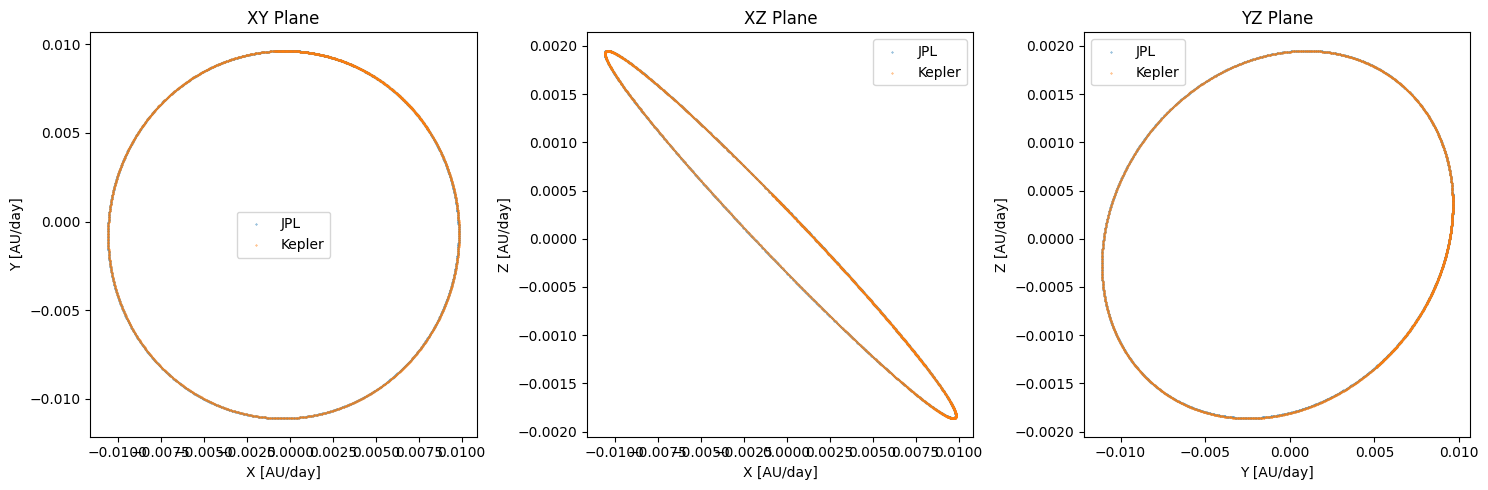

In [8]:
# Create a figure with 3 subplots (for XY, XZ, YZ views)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# XY plane (subplot 1)
axes[0].scatter(vjpl[:, 0], vjpl[:, 1], s=0.1, label='JPL')
axes[0].scatter(vkep[:, 0], vkep[:, 1], s=0.1, label='Kepler')
axes[0].set_xlabel('X [AU/day]')
axes[0].set_ylabel('Y [AU/day]')
axes[0].set_title('XY Plane')
axes[0].legend()

# XZ plane (subplot 2)
axes[1].scatter(vjpl[:, 0], vjpl[:, 2], s=0.1, label='JPL')
axes[1].scatter(vkep[:, 0], vkep[:, 2], s=0.1, label='Kepler')
axes[1].set_xlabel('X [AU/day]')
axes[1].set_ylabel('Z [AU/day]')
axes[1].set_title('XZ Plane')
axes[1].legend()

# YZ plane (subplot 3)
axes[2].scatter(vjpl[:, 1], vjpl[:, 2], s=0.1, label='JPL')
axes[2].scatter(vkep[:, 1], vkep[:, 2], s=0.1, label='Kepler')
axes[2].set_xlabel('Y [AU/day]')
axes[2].set_ylabel('Z [AU/day]')
axes[2].set_title('YZ Plane')
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

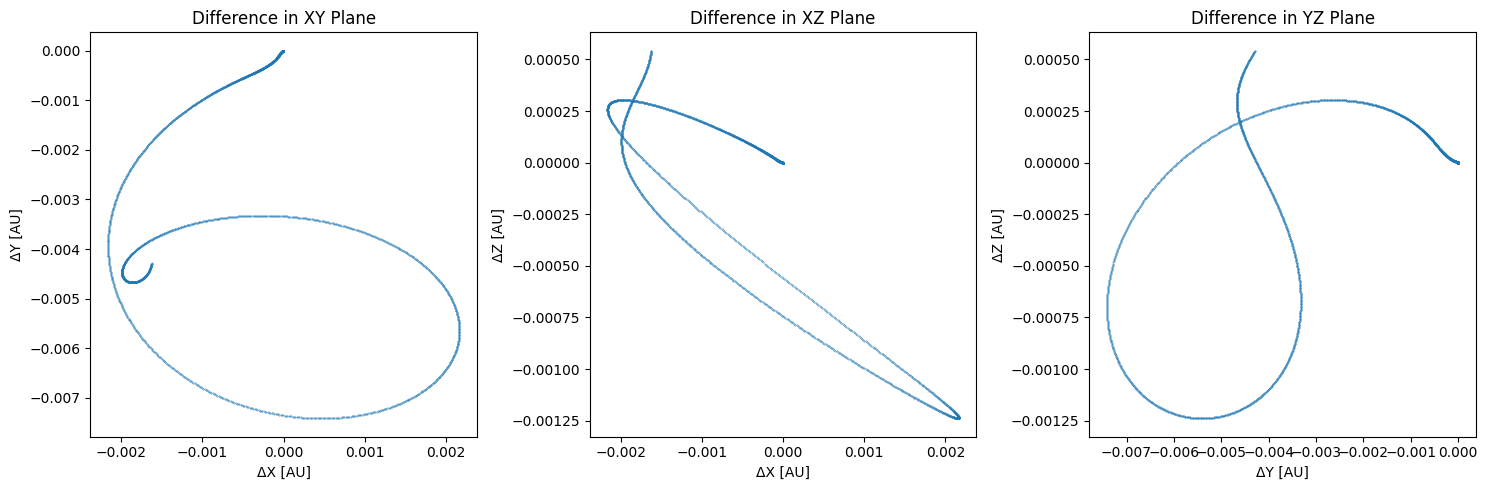

In [9]:
diff = rjpl - rkep

# Create a figure with 3 subplots (for differences in XY, XZ, YZ views)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Difference in the XY plane (subplot 1)
axes[0].scatter(diff[:, 0], diff[:, 1], s=0.1)
axes[0].set_xlabel('ΔX [AU]')
axes[0].set_ylabel('ΔY [AU]')
axes[0].set_title('Difference in XY Plane')

# Difference in the XZ plane (subplot 2)
axes[1].scatter(diff[:, 0], diff[:, 2], s=0.1)
axes[1].set_xlabel('ΔX [AU]')
axes[1].set_ylabel('ΔZ [AU]')
axes[1].set_title('Difference in XZ Plane')

# Difference in the YZ plane (subplot 3)
axes[2].scatter(diff[:, 1], diff[:, 2], s=0.1)
axes[2].set_xlabel('ΔY [AU]')
axes[2].set_ylabel('ΔZ [AU]')
axes[2].set_title('Difference in YZ Plane')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

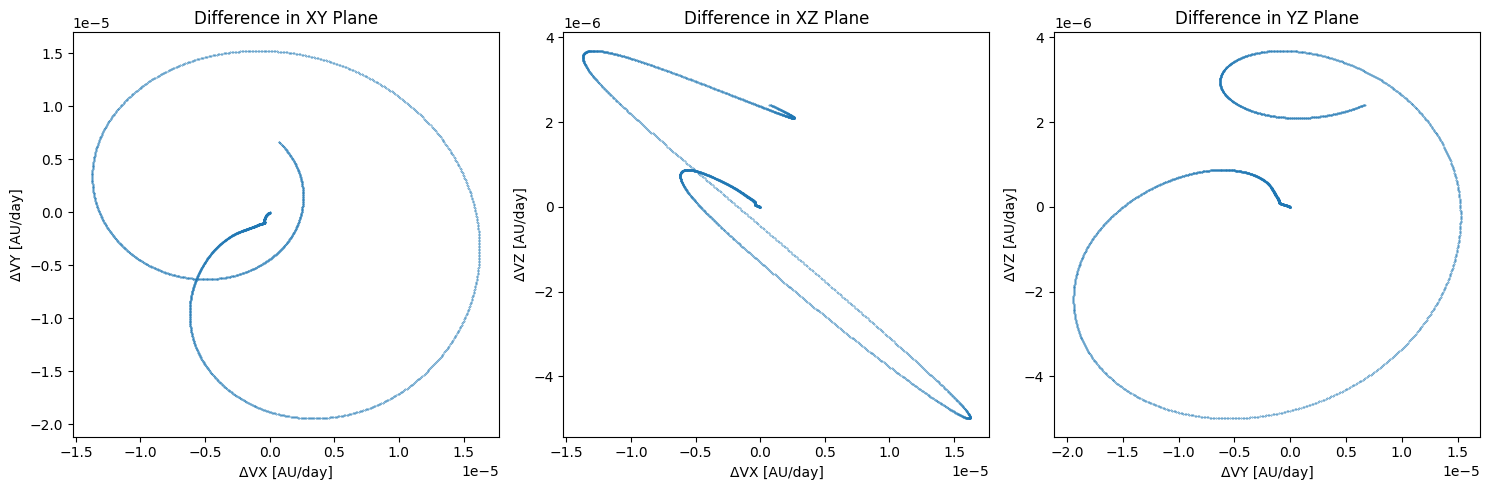

In [10]:
diff = vjpl - vkep

# Create a figure with 3 subplots (for differences in XY, XZ, YZ views)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Difference in the XY plane (subplot 1)
axes[0].scatter(diff[:, 0], diff[:, 1], s=0.1)
axes[0].set_xlabel('ΔVX [AU/day]')
axes[0].set_ylabel('ΔVY [AU/day]')
axes[0].set_title('Difference in XY Plane')

# Difference in the XZ plane (subplot 2)
axes[1].scatter(diff[:, 0], diff[:, 2], s=0.1)
axes[1].set_xlabel('ΔVX [AU/day]')
axes[1].set_ylabel('ΔVZ [AU/day]')
axes[1].set_title('Difference in XZ Plane')

# Difference in the YZ plane (subplot 3)
axes[2].scatter(diff[:, 1], diff[:, 2], s=0.1)
axes[2].set_xlabel('ΔVY [AU/day]')
axes[2].set_ylabel('ΔVZ [AU/day]')
axes[2].set_title('Difference in YZ Plane')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## That works great! Now to benchmark the propagator

In [11]:
import time

iters = 10000
start_time = time.time()
for i in range(iters):
    rkep,vkep = compute_trajectory(dtgrid,[a,e,i,omega,Omega,M],mu)
elasped = time.time() - start_time

In [12]:
print("Ran Code ",iters ,"times")
print("In ",elasped," seconds")
print("One prediction takes ", elasped/iters, " seconds")

Ran Code  10000 times
In  2.8248395919799805  seconds
One prediction takes  0.00028248395919799803  seconds


## 0.2 milliseconds per prediction. Excellent!